In [1]:
!pip install sktime "numpy<2.0" -U --target ./mysitepackages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [2]:
import sys
sys.path.insert(0, './mysitepackages')

import numpy as np
import pandas as pd

In [3]:
rawdata = pd.read_csv('../input/yield-curve-modeling-nelson-siegel-svensson/mybetas_joint_ts.csv')
rawdata['Date'] = pd.to_datetime(rawdata['Date'])
rawdata.set_index('Date', inplace = True)
rawdata = rawdata.asfreq(freq = 'MS')
rawdata_diff = rawdata.diff().dropna()

In [4]:
rawdata

,eurgovy_beta0,eurgovy_beta1,eurgovy_beta2,eurgovy_beta3,ustrsy_beta0,ustrsy_beta1,ustrsy_beta2,ustrsy_beta3
Date,,,,,,,,
2004-09-01,1.895047,3.543703,-1.388280,0.243992,0.140689,3.604076,-3.028202,3.287305
2004-10-01,1.956608,3.367255,-1.836896,0.419308,0.176924,3.230307,-2.893596,3.224787
2004-11-01,1.965352,3.140937,-2.386498,0.907575,0.154684,2.919376,-3.435876,3.497560
2004-12-01,1.998351,2.705443,-2.694401,1.638828,0.224327,2.761273,-2.595792,2.971682
2005-01-01,2.017311,3.049352,-1.786706,-0.482483,0.257621,2.284449,-2.736147,2.800263
...,...,...,...,...,...,...,...,...
2024-09-01,3.473117,-1.031439,-4.856025,5.188517,-0.348730,-0.523098,-4.495308,1.654118
2024-10-01,3.093899,-0.896241,-5.313697,5.459718,-0.224926,0.220901,-3.712126,0.648428
2024-11-01,2.865768,-0.142480,-3.612778,3.954558,0.157878,0.223484,-2.149297,1.033431


In [5]:
from sktime.forecasting.var import VAR

In [6]:
model_var = VAR(maxlags = 3, verbose = True, trend = 'n', ic = 'aic')
model_var.fit(rawdata_diff)
model_var.predict(fh = [*range(1, 37)])

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 0, FPE -> 1, HQIC ->  0>
Using 1 based on aic criterion


,eurgovy_beta0,eurgovy_beta1,eurgovy_beta2,eurgovy_beta3,ustrsy_beta0,ustrsy_beta1,ustrsy_beta2,ustrsy_beta3
Date,,,,,,,,
2025-02-01,-1.090610e-01,1.368506e-02,-1.492043e-02,3.594652e-01,-7.304368e-02,-2.062281e-02,-2.990882e-01,6.630935e-01
2025-03-01,-4.717410e-02,5.842063e-02,1.234567e-02,-5.525025e-02,2.874259e-02,1.980367e-02,1.174905e-02,3.423313e-03
2025-04-01,-1.769253e-02,4.123829e-03,9.489538e-03,2.772985e-02,1.198385e-03,8.946815e-03,4.925799e-03,1.051999e-02
2025-05-01,-7.660855e-03,9.602116e-03,2.729467e-03,-4.490706e-03,2.391345e-03,5.157620e-03,5.151894e-03,1.343472e-03
2025-06-01,-2.887938e-03,1.229441e-03,1.064239e-03,3.154483e-03,3.572691e-04,7.521623e-04,-8.165694e-04,4.098245e-03
2025-07-01,-1.209225e-03,1.244169e-03,4.959843e-04,-2.802729e-04,3.907182e-04,7.558083e-04,7.267743e-04,8.938270e-05
2025-08-01,-4.693743e-04,2.810885e-04,1.801285e-04,3.666509e-04,7.164056e-05,1.928496e-04,2.819853e-05,4.578837e-04
2025-09-01,-1.926470e-04,1.801941e-04,7.483946e-05,-1.718512e-06,5.340195e-05,1.043688e-04,7.597503e-05,8.198182e-05
2025-10-01,-7.570085e-05,5.053518e-05,2.951178e-05,4.530857e-05,1.436795e-05,3.306052e-05,1.006224e-05,6.252576e-05


In [7]:
print('\n\n*****************************************\n',\
      model_var._fitted_forecaster.test_normality().summary())
print('\n\n*****************************************\n',\
      model_var._fitted_forecaster.test_whiteness().summary())



*****************************************
 normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.281e+04          26.30   0.000 16
----------------------------------------


*****************************************
 Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 10 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         791.9          632.9   0.000 576
-----------------------------------------


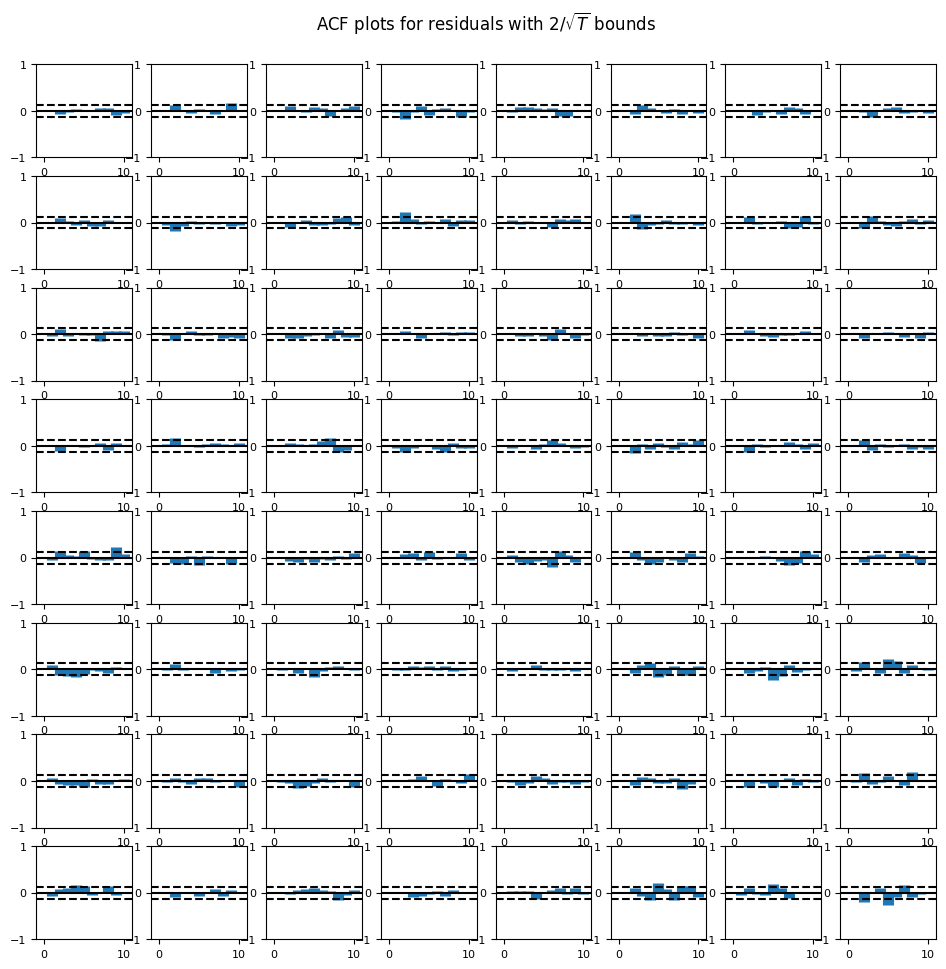

In [8]:
model_var._fitted_forecaster.plot_acorr().show()

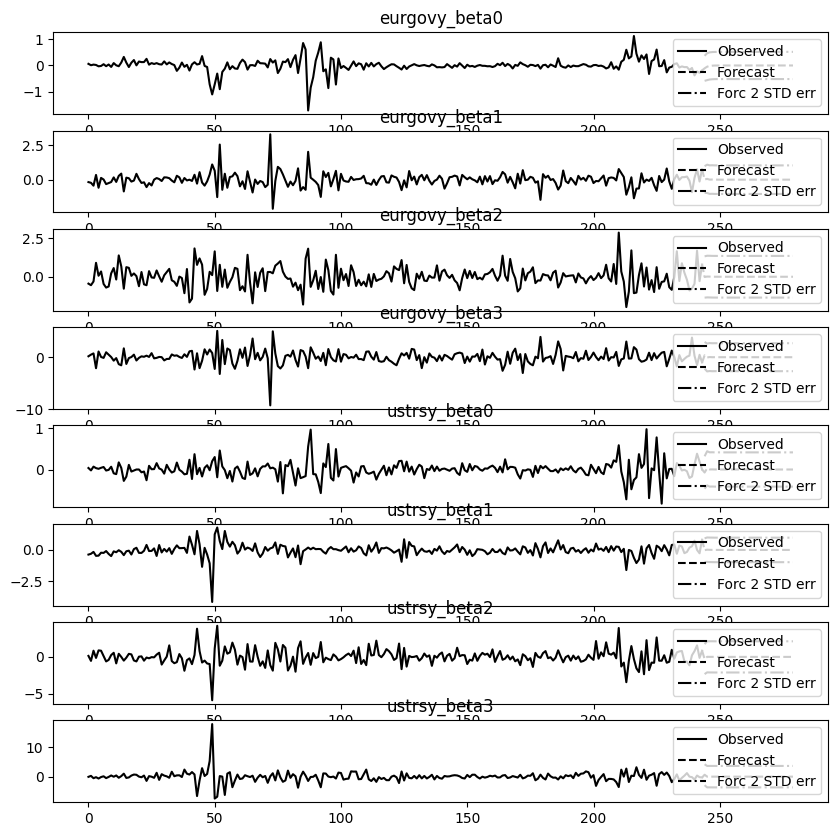

In [9]:
model_var._fitted_forecaster.plot_forecast(36).show()

In [10]:
from sktime.forecasting.var_reduce import VARReduce
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sktime.forecasting.darts import DartsLinearRegressionModel, DartsXGBModel 

In [11]:
lags = 1

model_var2 = VARReduce(lags = lags, regressor = ElasticNetCV(fit_intercept = False))
model_var2.fit(rawdata_diff)

VARReduce(regressor=ElasticNetCV(fit_intercept=False))

In [12]:
import xgboost as xgb
model_xgb = VARReduce(lags = lags, regressor = xgb.XGBRegressor())
model_xgb.fit(y = rawdata_diff)

VARReduce(regressor=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...))

In [13]:
# Residual's tests
from statsmodels.stats.diagnostic import acorr_ljungbox

model_var2_resids = model_var2.predict_residuals(rawdata_diff.iloc[lags:, :])
model_xgb_resids = model_xgb.predict_residuals(rawdata_diff.iloc[lags:, :])
print((model_var2_resids.apply(lambda x: acorr_ljungbox(x, lags = 12).iloc[:, 1]) <0.05).apply(sum).sum())
print((model_xgb_resids.apply(lambda x: acorr_ljungbox(x, lags = 12).iloc[:, 1]) <0.05).apply(sum).sum())

38
5


In [14]:
model_var2_insample = model_var.predict(fh = rawdata_diff.index[lags:])
model_var2_resids = (rawdata_diff - model_var2_insample).dropna()
model_var2_forecast = model_var.predict(fh = range(1,36+1))
model_var2_forecast.index.name = 'Date'

model_var2_bootstraps_diff = []
for i in range(100):
    model_var2_bootstraps_diff.append(model_var2_resids.sample(n = 36, replace = True, ignore_index = True).values + model_var2_forecast)

model_var2_bootstraps = []
for df in model_var2_bootstraps_diff:
    model_var2_bootstraps.append(
        pd.concat([
            rawdata.tail(1),
            df
        ]).cumsum().tail(-1)
    )

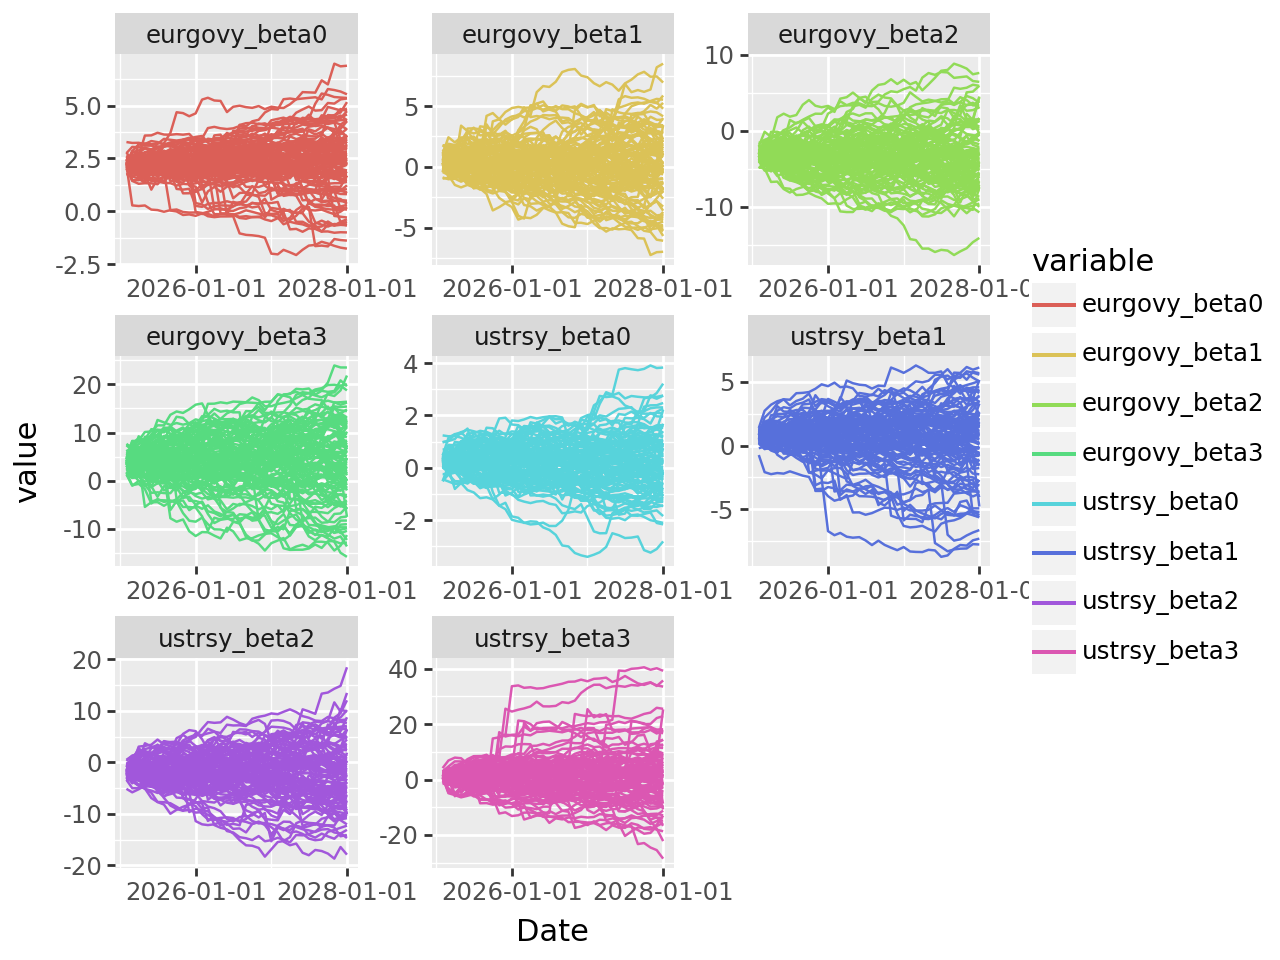

In [15]:
import xarray as xr
from plotnine import ggplot, geom_line, aes, facet_wrap

betasims = xr.concat([df.to_xarray().to_dataarray() for df in model_var2_bootstraps], dim = 'sim_id', create_index_for_new_dim=True)
betasims_2d = betasims.stack({'new': ('sim_id', 'variable')}, create_index= True).to_dataframe(name='value')[['value']].reset_index()

ggplot(betasims_2d, aes(x='Date', y='value', color='variable', group='sim_id'))+geom_line()+facet_wrap('variable', scales='free')

<Axes: >

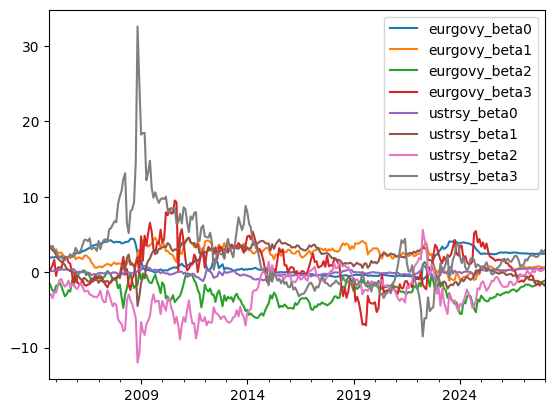

In [16]:
pd.concat([
    rawdata, 
    pd.concat([rawdata.tail(1), model_xgb.predict(fh = [*range(1, 37)])]).cumsum().tail(-1)
]).plot()

In [17]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sktime.forecasting.var_reduce import VARReduce
from sktime.forecasting.compose import MultiplexForecaster, TransformedTargetForecaster

forecaster = MultiplexForecaster(forecasters = [
    ('var', VARReduce(lags = 1, regressor = LinearRegression(fit_intercept = False))),
    ('elasticvar', VARReduce(lags = 1, regressor = ElasticNetCV(fit_intercept = False))),
    ('kernelridgevar', VARReduce(lags = 1, regressor = KernelRidge(kernel = 'linear', gamma = None))),
    ('xgbvar', VARReduce(lags = 1, regressor = XGBRegressor())),
    
], selected_forecaster = 'var')


In [18]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.difference import Differencer
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler

pipe = TransformedTargetForecaster(steps=[
    ('differ', Differencer()),
    ('powertrafo', TabularToSeriesAdaptor(PowerTransformer())),
    ('scaler', TabularToSeriesAdaptor(StandardScaler())),
    ('forecaster', forecaster),
])
pipe.fit(rawdata)

TransformedTargetForecaster(steps=[('differ', Differencer()),
                                   ('powertrafo',
                                    TabularToSeriesAdaptor(transformer=PowerTransformer())),
                                   ('scaler',
                                    TabularToSeriesAdaptor(transformer=StandardScaler())),
                                   ('forecaster',
                                    MultiplexForecaster(forecasters=[('var',
                                                                      VARReduce(regressor=LinearRegression(fit_intercept=False))),
                                                                     ('elasticvar',
                                                                      VARReduce(regressor=ElasticN...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)))],
                                                        selected_forecaster='var'))])

In [19]:
%%time

from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import ExpandingWindowSplitter
from sktime.performance_metrics.forecasting import MeanSquaredError

cv = ExpandingWindowSplitter(fh = range(1, 37), step_length=36) 
gscv = ForecastingGridSearchCV(
    scoring=MeanSquaredError(),
    cv=cv,
    param_grid={'selected_forecaster':[
                                        'var', 
                                        'elasticvar', 'kernelridgevar',
                                        'xgbvar'
                                      ],
                'forecaster__var__lags': [1],
                'forecaster__elasticvar__lags': [1],
                'forecaster__kernelridgevar__lags': [1],
                'kernel': ['rbf'],
                'forecaster__kernelridgevar__gamma': [0.1],
                'forecaster__xgbvar__lags': [1],
               },
    forecaster=pipe,
    verbose=1,
    return_n_best_forecasters = -1,
    #error_score='raise',
    
) 

gscv.fit(rawdata)

Fitting 6 folds for each of 4 candidates, totalling 24 fits
CPU times: user 5.33 s, sys: 288 ms, total: 5.62 s
Wall time: 15.1 s


ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=range(1, 37),
                                                   step_length=36),
                        forecaster=TransformedTargetForecaster(steps=[('differ',
                                                                       Differencer()),
                                                                      ('powertrafo',
                                                                       TabularToSeriesAdaptor(transformer=PowerTransformer())),
                                                                      ('scaler',
                                                                       TabularToSeriesAdaptor(transformer=StandardScaler())),
                                                                      ('forecaster',
                                                                       MultiplexForecaster(forecasters=[('var',
                                                                                                         VARReduce...
                                                                                           selected_forecaster='var'))]),
                        param_grid={'forecaster__elasticvar__lags': [1],
                                    'forecaster__kernelridgevar__gamma': [0.1],
                                    'forecaster__kernelridgevar__lags': [1],
                                    'forecaster__var__lags': [1],
                                    'forecaster__xgbvar__lags': [1],
                                    'kernel': ['rbf'],
                                    'selected_forecaster': ['var', 'elasticvar',
                                                            'kernelridgevar',
                                                            'xgbvar']},
                        return_n_best_forecasters=-1,
                        scoring=MeanSquaredError(), verbose=1)

In [20]:
gscv.predict(fh = range(1, 37))

,eurgovy_beta0,eurgovy_beta1,eurgovy_beta2,eurgovy_beta3,ustrsy_beta0,ustrsy_beta1,ustrsy_beta2,ustrsy_beta3
2025-02-01,2.363651,0.418635,-3.147160,3.491850,0.301739,0.800783,-1.439966,0.511866
2025-03-01,2.367328,0.378072,-3.192688,3.541774,0.309351,0.830974,-1.442370,0.411768
2025-04-01,2.379033,0.337072,-3.238217,3.593336,0.303154,0.857410,-1.444775,0.311670
2025-05-01,2.393178,0.296088,-3.283745,3.644833,0.297636,0.879870,-1.447180,0.211573
2025-06-01,2.407922,0.255104,-3.329274,3.696333,0.291927,0.901485,-1.449585,0.111475
2025-07-01,2.422822,0.214120,-3.374802,3.747833,0.286205,0.922859,-1.451989,0.011377
2025-08-01,2.437763,0.173136,-3.420331,3.799333,0.280477,0.944173,-1.454394,-0.088721
2025-09-01,2.452715,0.132152,-3.465859,3.850833,0.274748,0.965471,-1.456799,-0.188818
2025-10-01,2.467668,0.091168,-3.511388,3.902333,0.269018,0.986766,-1.459204,-0.288916
2025-11-01,2.482623,0.050184,-3.556916,3.953832,0.263289,1.008059,-1.461609,-0.389014


In [21]:
pd.options.display.max_colwidth=350
gscv.cv_results_

,mean_test_MeanSquaredError,mean_fit_time,mean_pred_time,params,rank_test_MeanSquaredError
0,81.775341,0.149724,0.123618,"{'forecaster__elasticvar__lags': 1, 'forecaster__kernelridgevar__gamma': 0.1, 'forecaster__kernelridgevar__lags': 1, 'forecaster__var__lags': 1, 'forecaster__xgbvar__lags': 1, 'kernel': 'rbf', 'selected_forecaster': 'var'}",4.0
1,12.357557,0.667373,0.311699,"{'forecaster__elasticvar__lags': 1, 'forecaster__kernelridgevar__gamma': 0.1, 'forecaster__kernelridgevar__lags': 1, 'forecaster__var__lags': 1, 'forecaster__xgbvar__lags': 1, 'kernel': 'rbf', 'selected_forecaster': 'elasticvar'}",1.0
2,18.474738,0.147738,0.149191,"{'forecaster__elasticvar__lags': 1, 'forecaster__kernelridgevar__gamma': 0.1, 'forecaster__kernelridgevar__lags': 1, 'forecaster__var__lags': 1, 'forecaster__xgbvar__lags': 1, 'kernel': 'rbf', 'selected_forecaster': 'kernelridgevar'}",2.0
3,22.304105,0.557135,0.502779,"{'forecaster__elasticvar__lags': 1, 'forecaster__kernelridgevar__gamma': 0.1, 'forecaster__kernelridgevar__lags': 1, 'forecaster__var__lags': 1, 'forecaster__xgbvar__lags': 1, 'kernel': 'rbf', 'selected_forecaster': 'xgbvar'}",3.0


In [22]:
%%time

from sktime.forecasting.model_evaluation import evaluate
from functools import reduce

crossval_results = evaluate(gscv.best_forecaster_, cv, y = rawdata, scoring=MeanSquaredError(), return_data = True)

errors_oos = (
    pipe.transform(reduce(lambda x,y: pd.concat([x,y]), crossval_results['y_pred'])) -
    pipe.transform(reduce(lambda x,y: pd.concat([x,y]), crossval_results['y_test']))
)

/kaggle/working/./mysitepackages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e-03, tolerance: 9.220e-04
/kaggle/working/./mysitepackages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e-03, tolerance: 9.220e-04
/kaggle/working/./mysitepackages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e-03, tolerance: 9.220e-04
/kaggle/working/./mysitepackages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: O

CPU times: user 5.09 s, sys: 10.2 ms, total: 5.1 s
Wall time: 5.09 s


<Axes: >

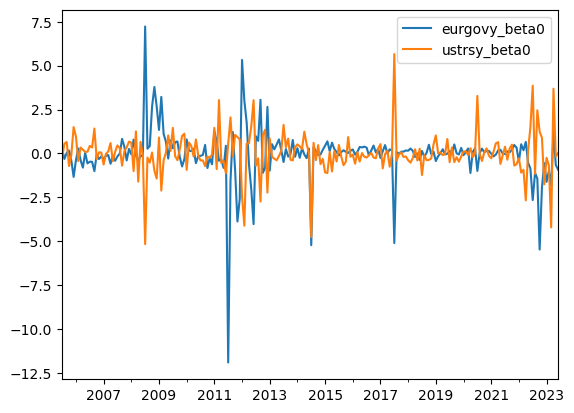

In [23]:
errors_oos.iloc[:, [0, 4]].plot()

In [24]:
def resample_residuals(residuals_df, forecast_df, n = 100, h = 36):
    results = []
    for i in range(n):
        results.append(residuals_df.sample(n = h, replace = True, ignore_index = True).values + forecast_df)
    return results

from scipy.stats import skewnorm, normal_inverse_gamma, multivariate_normal

def resample_mvnormal(residuals_df, forecast_df, n = 100, h = 36):
    mu, cov = multivariate_normal.fit(residuals_df)
    rinnov = multivariate_normal(mu, cov)
    results = []
    for i in range(n):
        results.append(rinnov.rvs(size = h) + forecast_df)
    return results

In [25]:
np.random.seed(1776655)

baseline = pipe.transform(gscv.best_forecaster_.predict(fh = range(1, 37)))
bootstraps = [pipe.inverse_transform(df) for df in resample_residuals(errors_oos, baseline, h = 36, n = 100)]
for bs in bootstraps:
    bs.index.name = 'Date'

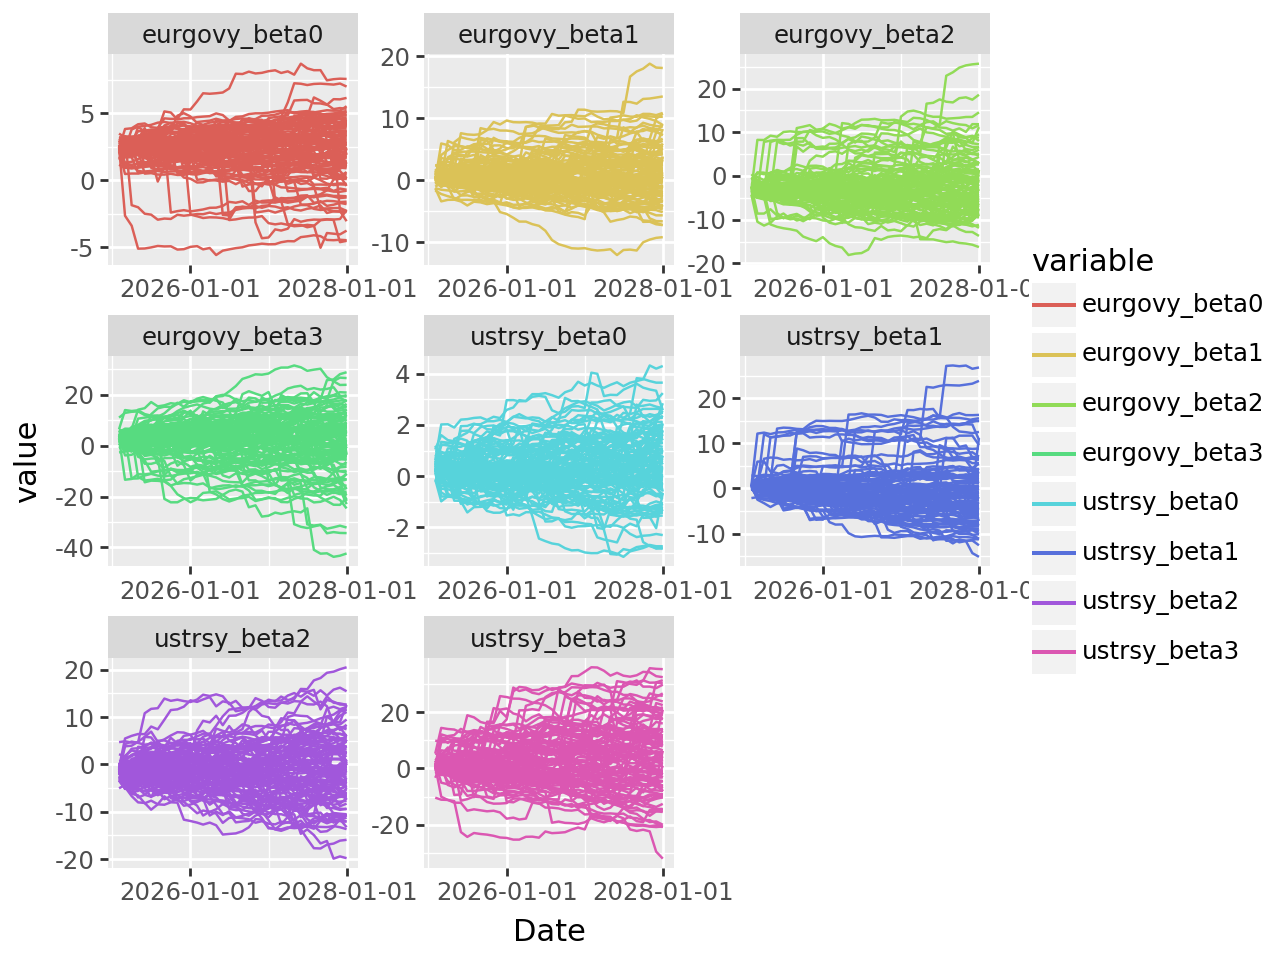

In [26]:
import xarray as xr
from plotnine import ggplot, geom_line, aes, facet_wrap

sims = xr.concat([df.to_xarray().to_dataarray() for df in bootstraps], dim = 'sim_id', create_index_for_new_dim=True)
sims_2d = sims.stack({'new': ('sim_id', 'variable')}, create_index= True).to_dataframe(name='value')[['value']].reset_index()

ggplot(sims_2d, aes(x='Date', y='value', color='variable', group='sim_id'))+geom_line()+facet_wrap('variable', scales='free')

In [27]:
sims_2d.to_csv('mybetas_joint_ml_sims.csv', header = True, index = False)